In [0]:
!pip install --upgrade --quiet gspread

In [0]:
#Import necessary libraries

import pandas as pd
import numpy as np
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import linregress as lm
from scipy.stats import ttest_ind as t

In [0]:
#Helper Functions

def get_trump_tweets():
  return pd.read_json('https://raw.githubusercontent.com/ctass/fall-workshop-2019/master/trump_tweets.json')

def get_cong_tweet(date):
  url = 'https://raw.githubusercontent.com/alexlitel/congresstweets/master/data/{}.json'.format(date)
  return pd.read_json(url)

# Basic Data Visualization and Analysis in Colab

In [0]:
df = get_trump_tweets()
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Visited a great family of a young man under ma...,2019-11-17 05:09:17+00:00,16791,82564,0.0,1195931893998456832
1,Twitter for iPhone,https://t.co/5Tbgwkpv4p,2019-11-17 03:11:35+00:00,12543,40887,0.0,1195902274922569728
2,Twitter for iPhone,https://t.co/65ERQ7YfUS,2019-11-17 02:23:27+00:00,13702,42214,0.0,1195890160006782976
3,Twitter for iPhone,https://t.co/YqJrGDPAOj,2019-11-17 02:22:20+00:00,12052,37899,0.0,1195889880540336128
4,Twitter for iPhone,RT @realDonaldTrump: #NewHoaxSameSwamp https:/...,2019-11-17 01:06:30+00:00,33821,0,1.0,1195870796352278528
...,...,...,...,...,...,...,...
12371,Twitter for iPhone,"January 20th 2017, will be remembered as the d...",2017-01-20 17:53:17+00:00,60604,218555,0.0,822502270503972864
12372,Twitter for iPhone,What truly matters is not which party controls...,2017-01-20 17:52:45+00:00,42790,180394,0.0,822502135233384448
12373,Twitter for iPhone,"power from Washington, D.C. and giving it back...",2017-01-20 17:51:58+00:00,18362,91143,0.0,822501939267141632
12374,Twitter for iPhone,Today we are not merely transferring power fro...,2017-01-20 17:51:25+00:00,20125,109640,0.0,822501803615014912


In [0]:
sb.set_style('whitegrid')

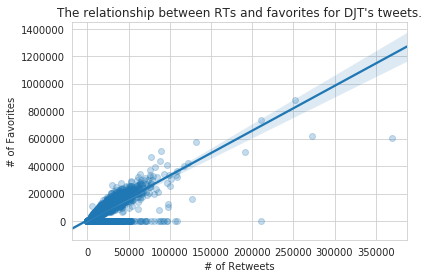

Does the number of favorites increase with the number of retweets?
LinregressResult(slope=3.2593172135718596, intercept=5758.976114850506, rvalue=0.7511562061382062, pvalue=0.0, stderr=0.025749403064578916)


In [0]:
plt.scatter(df['retweet_count'],df['favorite_count'], alpha=0.25)
sb.regplot(df['retweet_count'],df['favorite_count'],scatter=False)
plt.xlabel('# of Retweets')
plt.ylabel('# of Favorites')
plt.title("The relationship between RTs and favorites for DJT's tweets.")
plt.show()
print('Does the number of favorites increase with the number of retweets?')
print(lm(df['retweet_count'],df['favorite_count']))

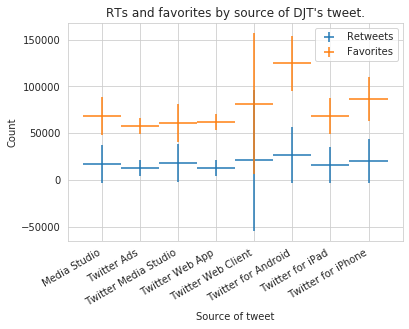

In [0]:
mean_retweets = df.groupby('source')['retweet_count'].mean()
std_retweets = df.groupby('source')['retweet_count'].std()

mean_favorites = df.groupby('source')['favorite_count'].mean()
std_favorites = df.groupby('source')['favorite_count'].std()

source_rt_name, source_rt_code = np.unique(mean_retweets.index, 
                                           return_inverse=True)
source_fv_name, source_fv_code = np.unique(mean_favorites.index, 
                                           return_inverse=True)

plt.errorbar(source_rt_code, mean_retweets, xerr=0.5, yerr=2*std_retweets, 
             linestyle='', label='Retweets')
plt.errorbar(source_rt_code, mean_favorites, xerr=0.5, yerr=2*std_retweets, 
             linestyle='', label='Favorites')

plt.xticks(source_rt_code, source_rt_name, rotation=30, ha='right')
plt.legend()
plt.title("RTs and favorites by source of DJT's tweet.")
plt.xlabel('Source of tweet')
plt.ylabel('Count')
plt.show()

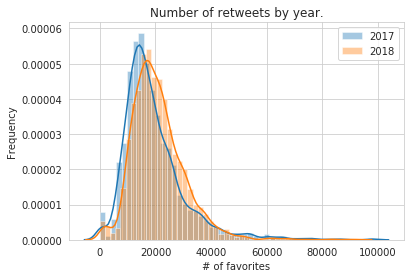

Is there a mean difference in the number of retweets for the years 2017 and 2018?
Ttest_indResult(statistic=-5.620027400448835, pvalue=2.0348792011376078e-08)


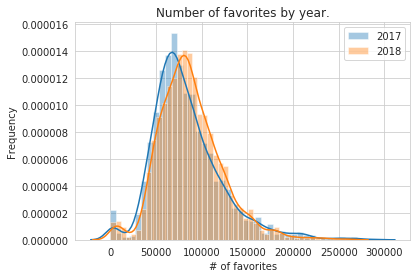

Is there a mean difference in the number of favorites for the years 2017 and 2018?
Ttest_indResult(statistic=-3.493471636598774, pvalue=0.0004815636604665693)


In [0]:
rt = {2017: [],
      2018: [],
      2019: []}

fv = {2017: [],
      2018: [],
      2019: []}

for i, row in df.iterrows():
    yr = row['created_at'].year
    if row['retweet_count'] < 100000:
      rt[yr].append(row['retweet_count']) 
    if row['favorite_count'] < 300000:
      fv[yr].append(row['favorite_count'])

sb.distplot(rt[2017], label='2017')
sb.distplot(rt[2018], label='2018')
#sb.distplot(rt[2019], label='2019')

plt.legend()
plt.xlabel('# of favorites')
plt.ylabel('Frequency')
plt.title('Number of retweets by year.')

plt.show()

print("Is there a mean difference in the number of retweets for the years 2017 and 2018?")
print(t(rt[2017],rt[2018],equal_var=False))

sb.distplot(fv[2017], label='2017')
sb.distplot(fv[2018], label='2018')
#sb.distplot(fv[2019], label='2019')

plt.legend()
plt.xlabel('# of favorites')
plt.ylabel('Frequency')
plt.title('Number of favorites by year.')

plt.show()

print("Is there a mean difference in the number of favorites for the years 2017 and 2018?")
print(t(fv[2017],fv[2018],equal_var=False))

# Accessing Tweets from Members of Congress (MoCs)

In [0]:
get_cong_tweet('2017-11-17')

,id,screen_name,user_id,time,link,text,source
0,931604541249867776,SenatorShaheen,109287731,2017-11-17T14:26:45-05:00,https://www.twitter.com/SenatorShaheen/statuse...,The #GOPTaxBill again tries to repeal parts of...,Twitter Web Client
1,931533670518788096,HFACDemocrats,61206798,2017-11-17T09:45:08-05:00,https://www.twitter.com/HFACDemocrats/statuses...,.@RepEliotEngel: $4.3 million for energy diver...,Twitter Web Client
2,931736976222330880,RoKhanna,771152516,2017-11-17T23:13:00-05:00,https://www.twitter.com/RoKhanna/statuses/9317...,Transgender Americans shouldn’t have to face d...,TweetDeck
3,931612108374073344,RepRickLarsen,404132211,2017-11-17T14:56:49-05:00,https://www.twitter.com/RepRickLarsen/statuses...,@renato_mariotti @ScottWhitmore Can't they jus...,Twitter for Android
4,931591446259486720,SenatorIsakson,78403308,2017-11-17T13:34:43-05:00,https://www.twitter.com/SenatorIsakson/statuse...,"This is one of the best honors I can think of,...",Twitter Web Client
...,...,...,...,...,...,...,...
1869,931555130012504064,GOPSenFinance,701821488,2017-11-17T11:10:25-05:00,https://www.twitter.com/RILAtweets/statuses/93...,RT @RILAtweets Retailers applaud @GOPSenFinanc...,Twitter Web Client
1870,931660881779412992,RepArrington,816284664658874368,2017-11-17T18:10:38-05:00,https://www.twitter.com/RepArrington/statuses/...,@HouseVetAffairs @TexasTech If you would like ...,Twitter for iPhone
1871,931620361858404352,SusanWBrooks,1074101017,2017-11-17T15:29:37-05:00,https://www.twitter.com/HoosiersWFH/statuses/9...,RT @HoosiersWFH Thank you @SusanWBrooks for vi...,Twitter Web Client
1872,931651988495970304,RepGraceMeng,1051127714,2017-11-17T17:35:17-05:00,https://www.twitter.com/RepGraceMeng/statuses/...,A day after I sent a letter to @DHSgov Secreta...,Twitter Web Client


# Sentiment Analysis

# (Other) Dictionary Methods

# Some analysis ideas!